In [1]:
from sklearn  import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import matplotlib.pyplot as plt

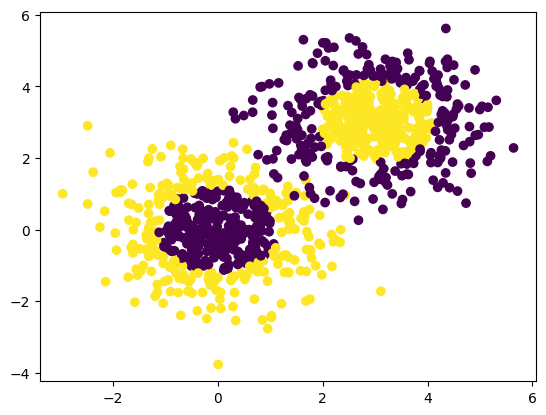

In [2]:
# 生成2维正态分布，可以是两类或多类数据
x1, y1 = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)
x2, y2 = make_gaussian_quantiles(mean = (3, 3), n_samples=500, n_features=2, n_classes=2)
x_data = np.concatenate((x1, x2))
y_data = np.concatenate((y1, -y2 +1)) # y从 0 -> 1 , 1 -> 0
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [3]:
def plot(model):
    x_min, x_max = x_data[:, 0].min() - 1 , x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1 , x_data[:, 1].max() + 1
    
    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
    z = z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, z)
    plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)
    plt.show()
  

In [8]:
dtree = tree.DecisionTreeClassifier(max_depth=3)
dtree.fit(x_data, y_data)


DecisionTreeClassifier(max_depth=3)

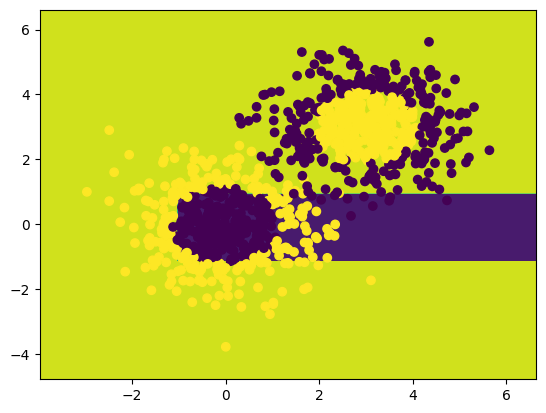

0.687

In [9]:
plot(dtree)

dtree.score(x_data, y_data)

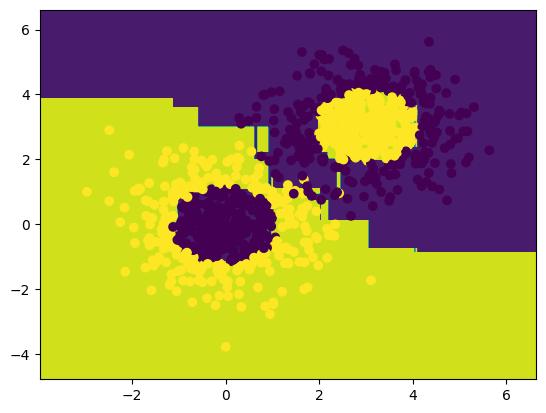

0.987

In [10]:
model=AdaBoostClassifier(dtree, n_estimators=10)

model.fit(x_data, y_data)
plot(model)
model.score(x_data, y_data)